In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

In [49]:
data = pd.read_csv("RT_IOT2022.csv")
data.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [47]:
print(data.describe())
print(data.describe(include='object'))

          Unnamed: 0      id.orig_p      id.resp_p  flow_duration  \
count  123117.000000  123117.000000  123117.000000  123117.000000   
mean    37035.089248   34639.258738    1014.305092       3.809566   
std     30459.106367   19070.620354    5256.371994     130.005408   
min         0.000000       0.000000       0.000000       0.000000   
25%      6059.000000   17702.000000      21.000000       0.000001   
50%     33100.000000   37221.000000      21.000000       0.000004   
75%     63879.000000   50971.000000      21.000000       0.000005   
max     94658.000000   65535.000000   65389.000000   21728.335578   

        fwd_pkts_tot   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
count  123117.000000  123117.000000      123117.000000      123117.000000   
mean        2.268826       1.909509           1.471218           0.820260   
std        22.336565      33.018311          19.635196          32.293948   
min         0.000000       0.000000           0.000000           0.000

In [6]:
missing_values_count = data.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0]
if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    print(columns_with_missing_values)
else:
    print("No missing values found in any column - numerical")


No missing values found in any column - numerical


In [7]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    print("Number of duplicate entries:", len(duplicate_rows))
    data.drop_duplicates(inplace=True)
    print("Duplicate entries removed.")
else:
    print("No duplicate entries found.")


No duplicate entries found.


In [8]:
X = data.drop(columns=['Attack_type'])
y = data['Attack_type']

In [9]:
attack_type_counts = data['Attack_type'].value_counts()

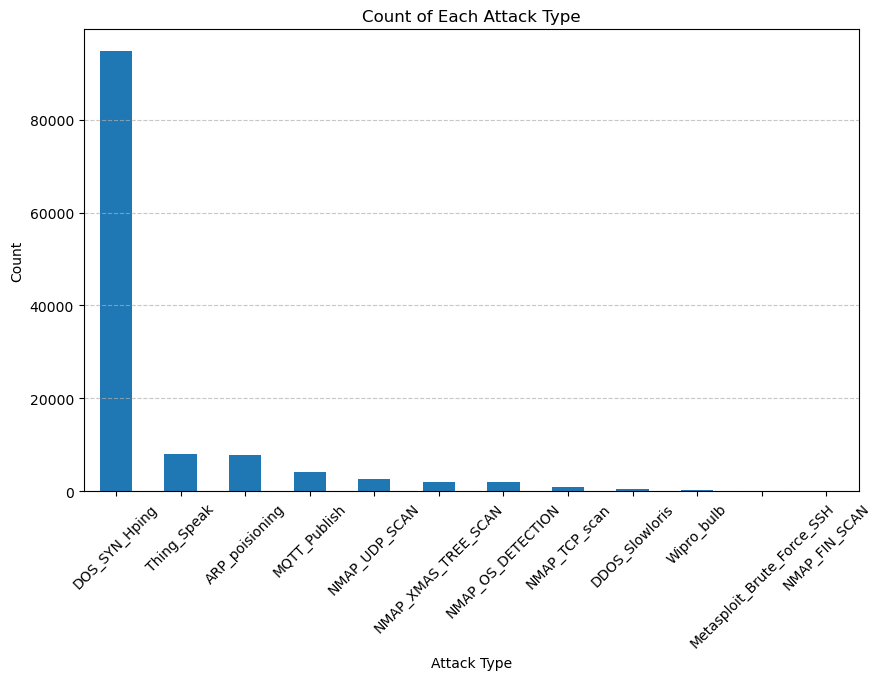

In [10]:
plt.figure(figsize=(10, 6))
attack_type_counts.plot(kind='bar')
plt.title('Count of Each Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

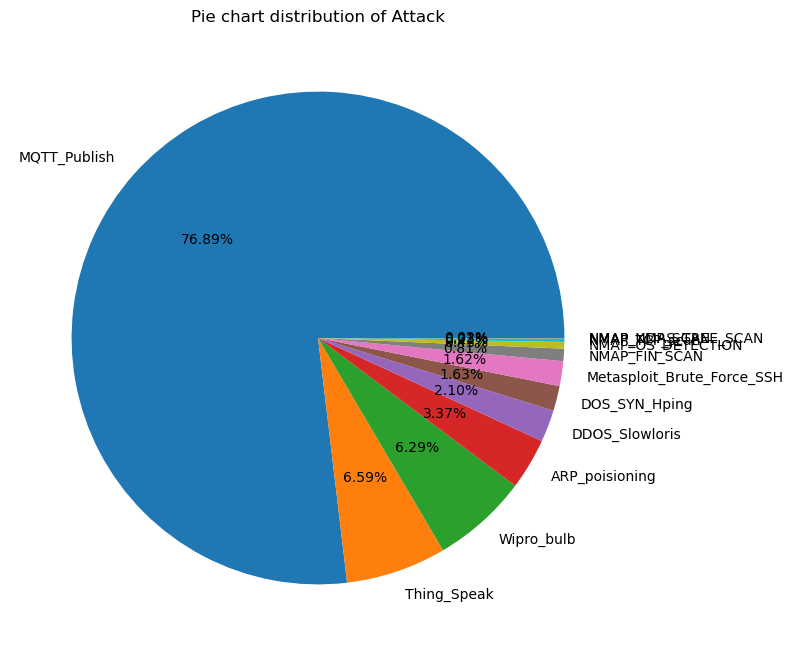

In [13]:
plt.figure(figsize=(8,8))
plt.pie(data['Attack_type'].value_counts(),autopct='%0.2f%%',labels=data.Attack_type.unique())
plt.title('Pie chart distribution of Attack')
plt.show()

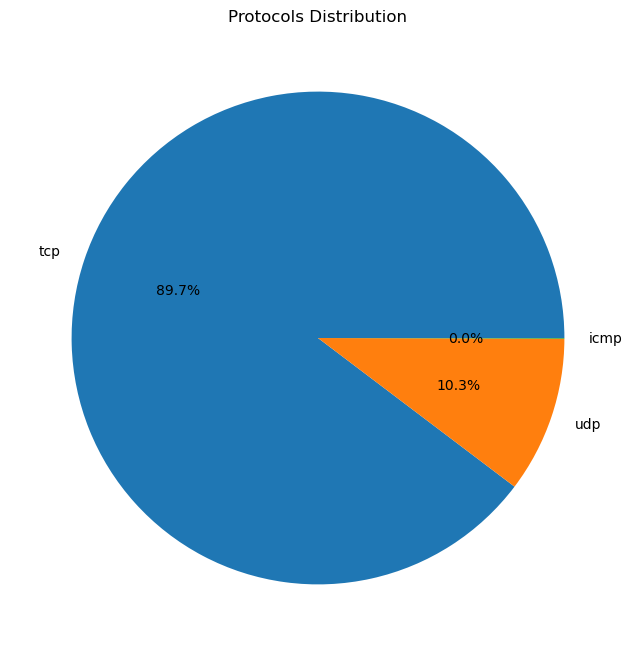

In [50]:
protocol_counts = data['proto'].value_counts()
plt.figure(figsize=(8, 8))
protocol_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Protocols Distribution')
plt.ylabel('')
plt.show()

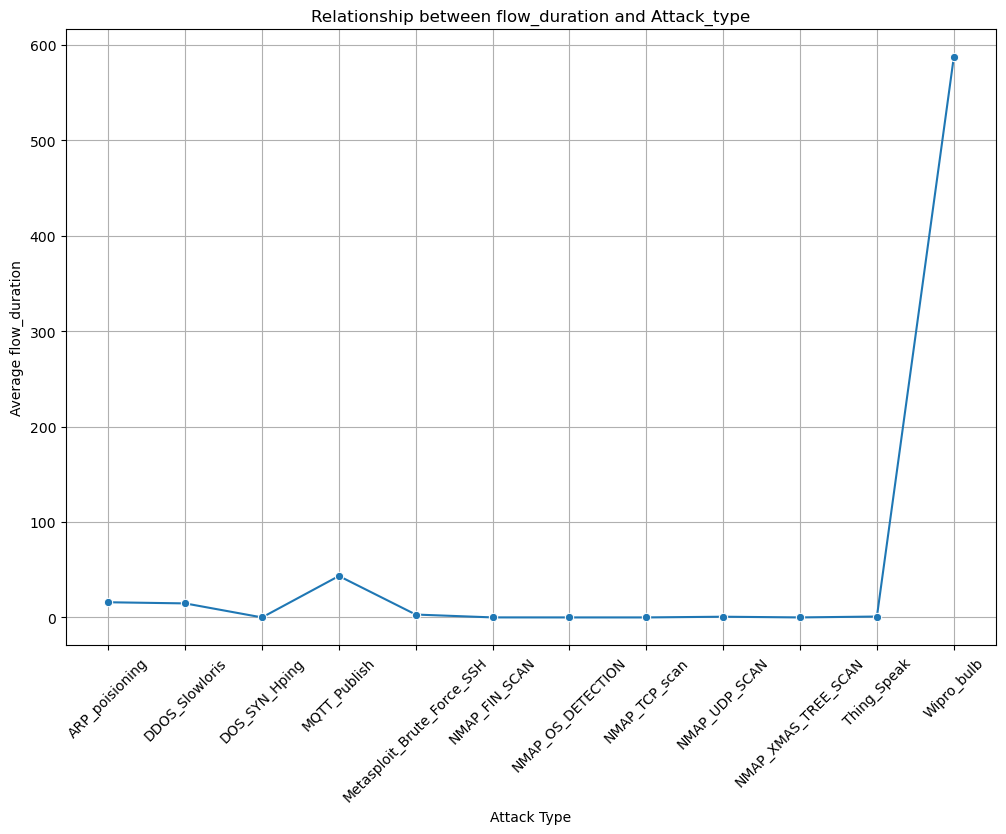

In [52]:
avg_flow_duration_by_attack_type = data.groupby('Attack_type')['flow_duration'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_flow_duration_by_attack_type, x='Attack_type', y='flow_duration', marker='o')
plt.title('Relationship between flow_duration and Attack_type')
plt.xlabel('Attack Type')
plt.ylabel('Average flow_duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

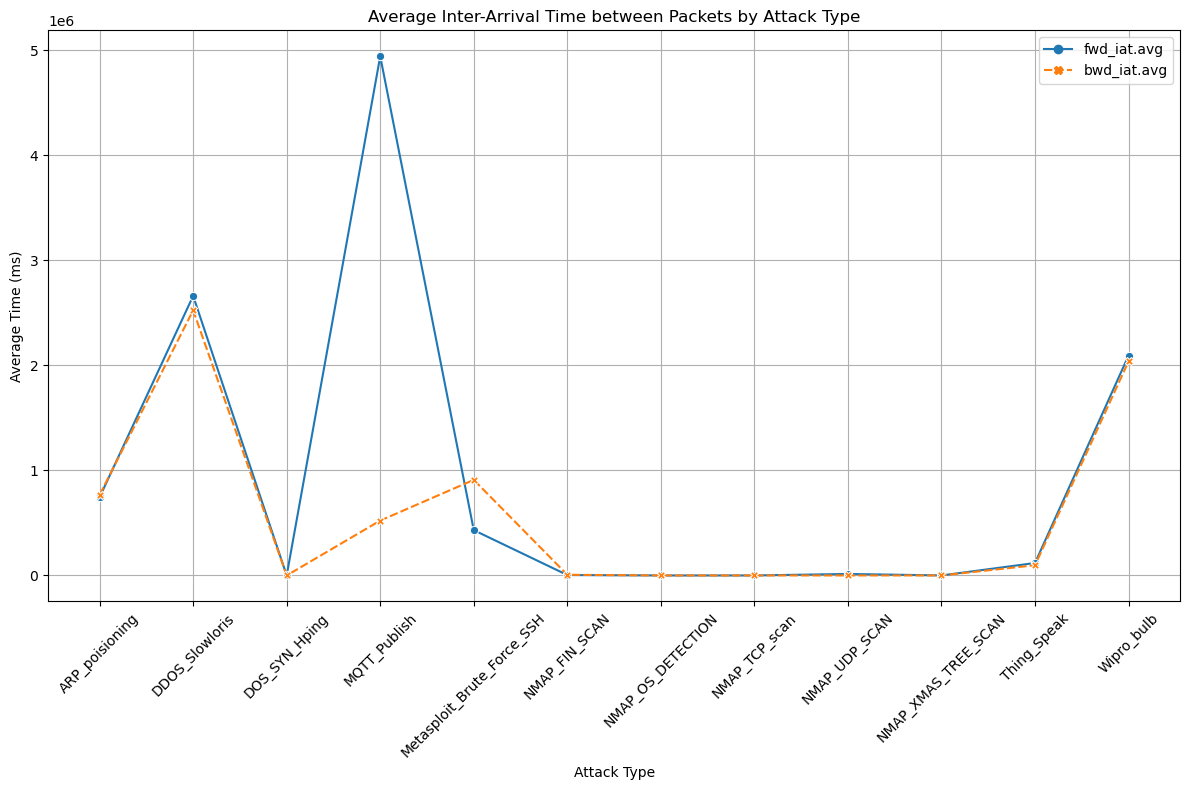

In [53]:
attack_type_iat = data.groupby('Attack_type')[['fwd_iat.avg', 'bwd_iat.avg']].mean()
plt.figure(figsize=(12, 8))
sns.lineplot(data=attack_type_iat, markers=True)
plt.title('Average Inter-Arrival Time between Packets by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Average Time (ms)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

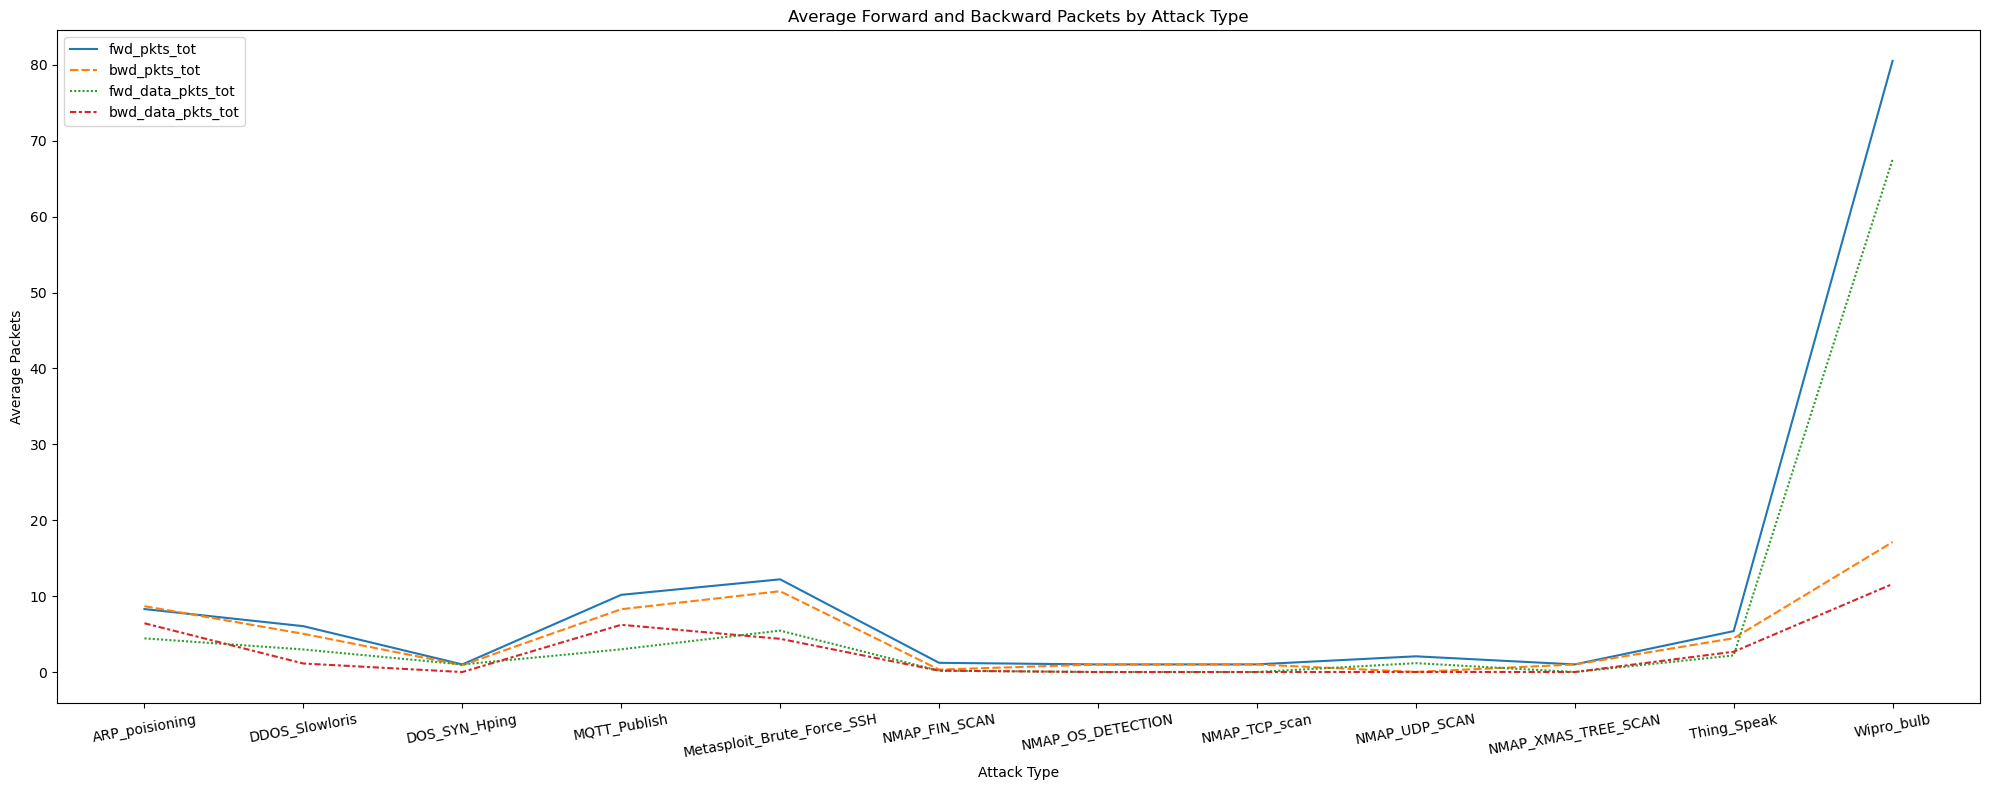

In [55]:
attack_type_fwd_bwd_points = data.groupby('Attack_type')[['fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot']].mean()
plt.figure(figsize=(20, 8))
sns.lineplot(data=attack_type_fwd_bwd_points)
plt.title('Average Forward and Backward Packets by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Average Packets')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

In [14]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

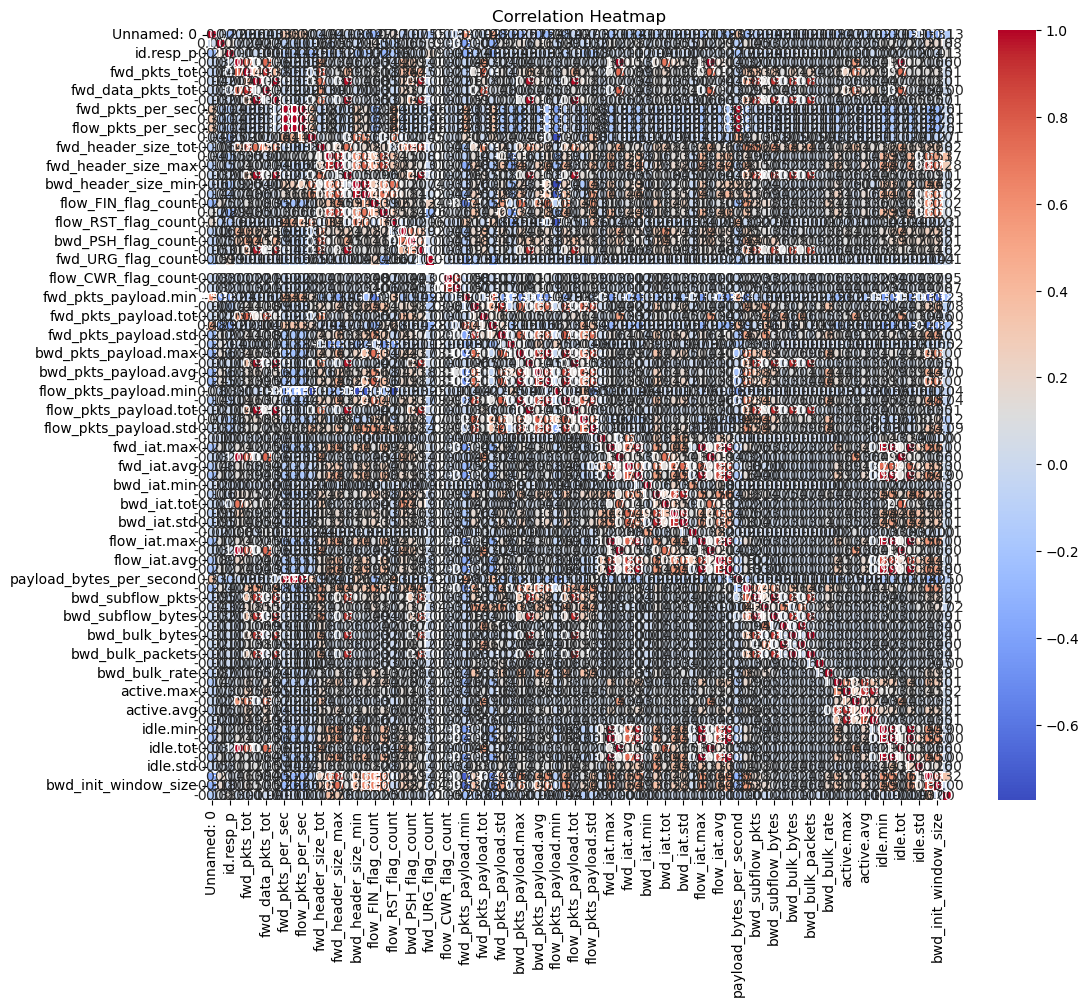

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
X_encoded = pd.get_dummies(X)

In [17]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_encoded, y)

RandomForestClassifier(random_state=42)

In [18]:
feature_importances = rf_classifier.feature_importances_

In [19]:
indices = feature_importances.argsort()[::-1]

In [20]:
print("Feature Importances:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {X_encoded.columns[idx]}: {feature_importances[idx]}")

Feature Importances:
1. id.resp_p: 0.0801529869129959
2. fwd_pkts_payload.avg: 0.07525906332325777
3. fwd_pkts_payload.min: 0.0725403911562269
4. fwd_subflow_bytes: 0.05542539596521805
5. service_-: 0.051064907716541014
6. fwd_pkts_payload.max: 0.04552195746124899
7. Unnamed: 0: 0.03455489114102288
8. flow_iat.max: 0.02578858272644779
9. fwd_pkts_payload.tot: 0.024500991602501566
10. flow_iat.min: 0.023678755044902113
11. flow_pkts_payload.avg: 0.022603835776742184
12. flow_duration: 0.02155545612044495
13. active.min: 0.01959686968749858
14. bwd_subflow_bytes: 0.019563952325319843
15. active.max: 0.01749310515580956
16. active.tot: 0.017349805423155434
17. flow_pkts_payload.tot: 0.016361058142212666
18. flow_iat.tot: 0.01503866556174379
19. active.avg: 0.014926265408486065
20. fwd_iat.tot: 0.014858812318336554
21. fwd_URG_flag_count: 0.014171478032005178
22. fwd_data_pkts_tot: 0.014121929393815978
23. fwd_header_size_tot: 0.014120237029873998
24. fwd_PSH_flag_count: 0.0121069918456128

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [23]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=['number']).columns),
        ('cat', categorical_transformer, X.select_dtypes(exclude=['number']).columns)])


In [25]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [28]:
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Cross Validation Score:", np.mean(cross_val_score(pipe, X, y, cv=5)))  
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Model: Random Forest
                            precision    recall  f1-score   support

            ARP_poisioning       0.99      1.00      0.99      1578
            DDOS_Slowloris       0.99      0.99      0.99       100
             DOS_SYN_Hping       1.00      1.00      1.00     18897
              MQTT_Publish       1.00      1.00      1.00       871
Metasploit_Brute_Force_SSH       1.00      0.83      0.91         6
             NMAP_FIN_SCAN       1.00      0.67      0.80         3
         NMAP_OS_DETECTION       1.00      1.00      1.00       393
             NMAP_TCP_scan       1.00      1.00      1.00       220
             NMAP_UDP_SCAN       0.99      0.99      0.99       489
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       384
               Thing_Speak       1.00      0.99      0.99      1625
                Wipro_bulb       1.00      0.95      0.97        58

                  accuracy                           1.00     24624
                 macro av

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

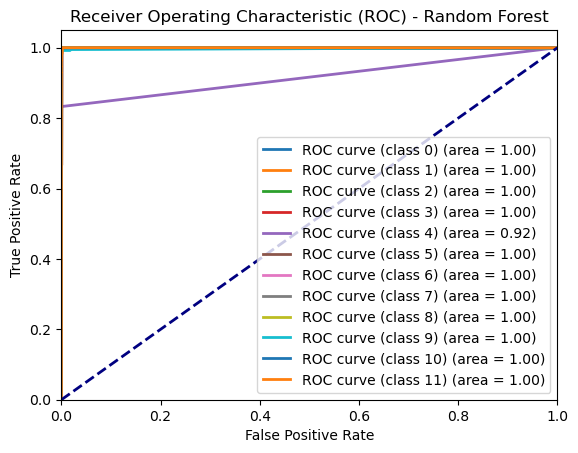

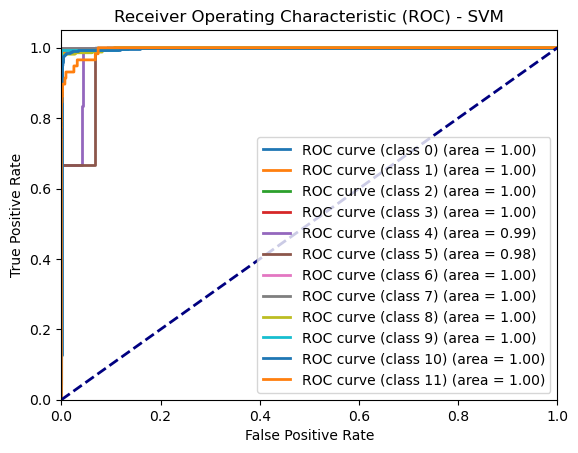

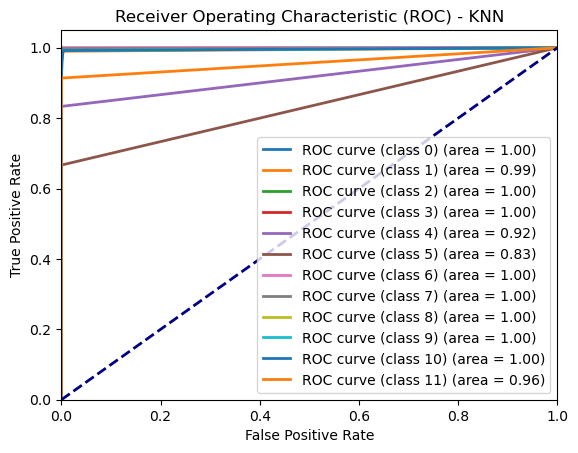

In [41]:
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.predict_proba(X_test)
    
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(np.unique(y_test))):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    for i in range(len(np.unique(y_test))):
        plt.plot(fpr[i], tpr[i], lw=lw, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {name}')
    plt.legend(loc="lower right")
    plt.show()
